<a href="https://colab.research.google.com/github/anhhngocc22/R-python/blob/main/DataMiningGK_Group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group 8
*   Trần Dương Ánh Ngọc - K204060289
*   Ngô Phương Anh
*   Trần Thị Thu Thảo
*   Phạm Thanh Trà






In [123]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from sklearn import preprocessing
from scipy.stats import norm, probplot,stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

#Data exploration

In [125]:
df = pd.read_excel('/content/drive/MyDrive/2. R phyton/DM GK/Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [127]:
df.shape

(541909, 8)

#Exploratory Data Analysis (EDA) & Visualization


In [128]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The results show that the min items of Quantity and UnitPrice both have negative values. A normal order that can be ordered and paid must always have at least 1 product and the total invoice must not be negative. Therefore, it is necessary to recheck these two data fields and filter inappropriate values.

In [129]:
# View parameters in data columns that are null
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The results show that many products have null descriptions. We will re-check. Besides, CustomerID has a null quantity of 135080. Customers can completely order online without an account, so it is acceptable for CustomerID to be null. However, the null rate of customer ID is too high, accounting for 24.3% of the amount of data, so we will decide to eliminate null values.

In [130]:
#Display rows with NULL values
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [131]:
#Delete the null customerID data column
df = df[~(df.CustomerID.isnull())]

#Only retrieve data with quantity and customerID other than 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [133]:
# Count the number of unique values in columns
cols = ['InvoiceNo', 'StockCode', 'Description','Quantity' ,'InvoiceDate','UnitPrice','CustomerID', 'Country']
unique_value_counts = df[cols].nunique().reset_index()
unique_value_counts.columns = ['column_name', 'unique_value_count']
unique_value_counts

,column_name,unique_value_count
0,InvoiceNo,18532
1,StockCode,3665
2,Description,3877
3,Quantity,301
4,InvoiceDate,17282
5,UnitPrice,440
6,CustomerID,4338
7,Country,37


StockCode represents the store's product quantity. StockCode and Description must have an equal number of data lines because the description is just a detailed product description for customers instead of the stockcode. Therefore, we need to recheck the description attribute.

In [134]:
#Group stockcode and description attributes together
df1 = df.groupby(["StockCode","Description"]).count().reset_index()
#count the number of duplicates in the data file
display(df1.StockCode.value_counts()[df1.StockCode.value_counts()>1].reset_index().head())

df[df['StockCode'] == df1.StockCode.value_counts()[df1.StockCode.value_counts()>1]
      .reset_index()['index'][4]]['Description'].unique()

,index,StockCode
0,23196,4
1,23236,4
2,23203,3
3,17107D,3
4,23535,3


array(['BICYCLE SAFTEY WALL ART', 'WALL ART BICYCLE SAFTEY ',
       'WALL ART BICYCLE SAFETY'], dtype=object)

The results show that there are products with 1 stockcode and 2-3 descriptions. Typical examples run in an array help us easily observe.

In [135]:
# Create a new data frame containing the maximum values of the Description column for each value of the Stockcode column
df_new = df[["StockCode", "Description"]].groupby(by=["StockCode"]).apply(pd.DataFrame.mode).reset_index(drop=True)

# Merge the two data columns of df_new and df1
df_fi = pd.merge(df, df_new, on='StockCode', how='left')

# Display the data table after joining
print(df_fi)

       InvoiceNo StockCode                        Description_x  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
397879    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
397880    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
397881    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
397882    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
397883    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0     

In [136]:
df_fi['Amount'] = df_fi.Quantity*df_fi.UnitPrice
df_fi = df_fi.drop('Description_x', axis=1)
df_fi = df_fi.rename(columns={'Description_y': 'Description'})

In [137]:
df_fi.nunique()

InvoiceNo      18532
StockCode       3665
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
Description     3647
Amount          2939
dtype: int64

##Segment Customer

The data set represents shoppers from 37 different countries

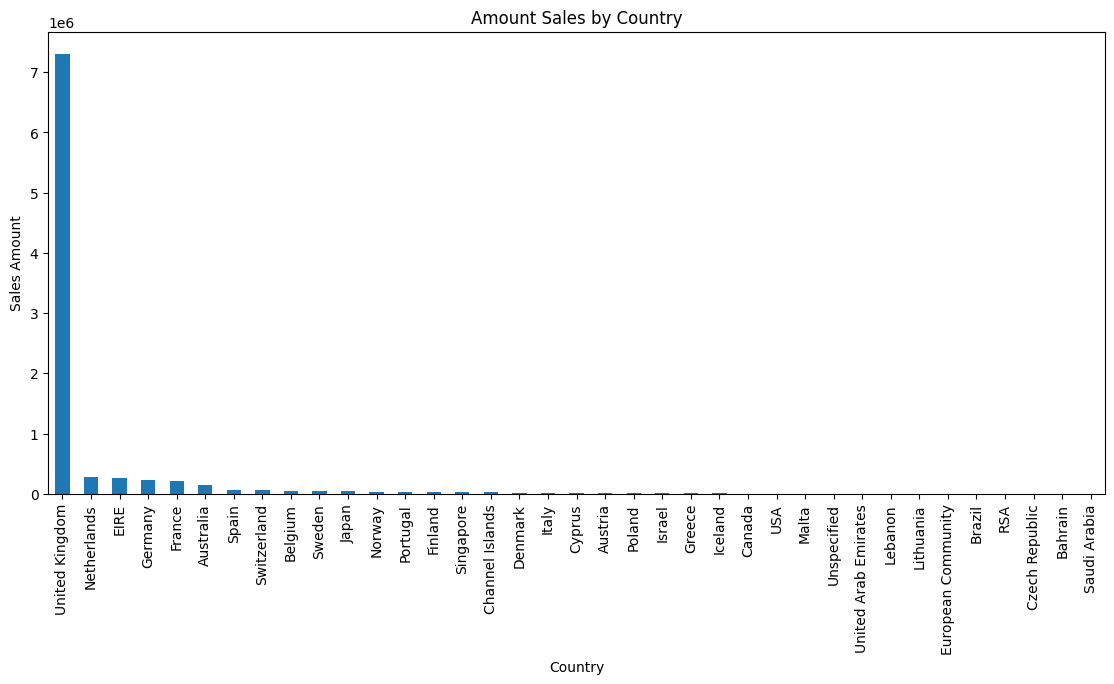

In [138]:
# Bar Chart: Total sales by country
fig = plt.figure(figsize=(30, 6))
f1 = fig.add_subplot(121)

country_sales = df_fi.groupby(["Country"])["Amount"].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', title='Amount Sales by Country')

plt.xlabel('Country')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)

plt.show()

Based on the chart, it shows that sales in the top 5 countries account for a large proportion, which is equivalent to the proportion of customers buying in the above 5 countries accounting for a high proportion.

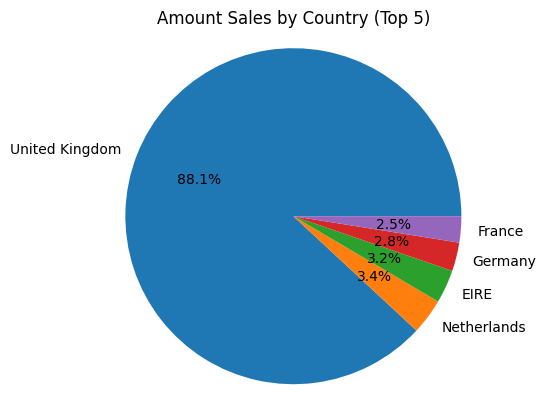

In [139]:
# Pie Chart: Total sales by country (top 5)
f1 = fig.add_subplot(121)

country_sales = df_fi.groupby(["Country"])["Amount"].sum().sort_values(ascending=False)[:5]
country_sales.plot(kind='pie', title='Amount Sales by Country (Top 5)',autopct='%1.1f%%')

plt.ylabel('')
plt.axis('equal')

plt.show()

Sales Percentage of Top 10 customers: 17.26%
Events Percentage of Top 10 customers: 8.93%


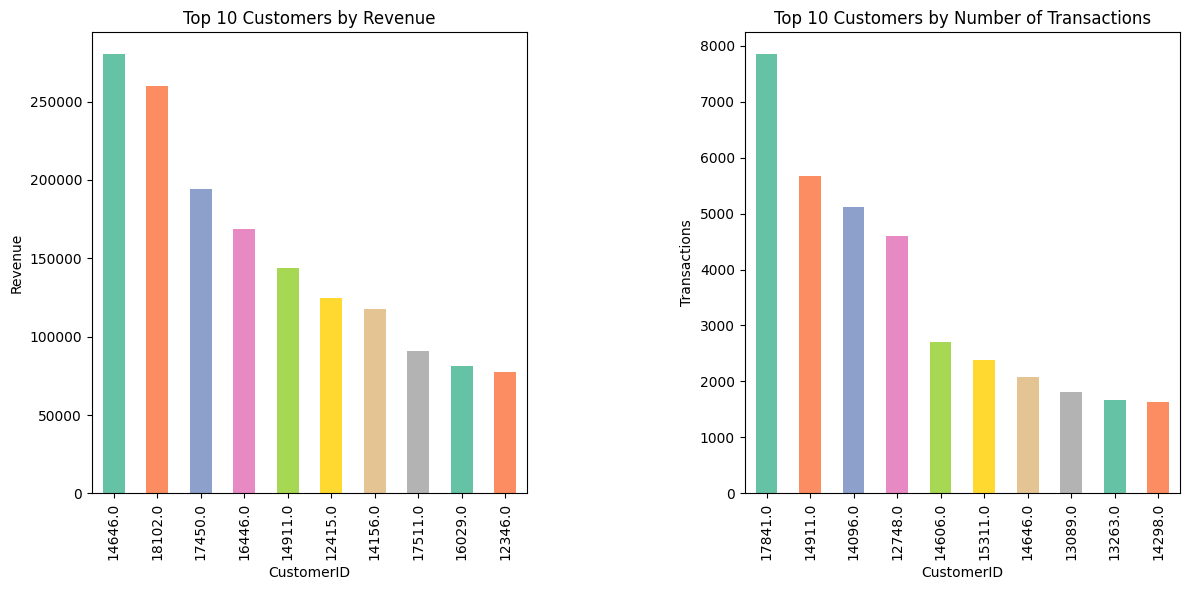

In [140]:
# Calculate total sales and number of transactions for each customer
total_sales_per_customer = df_fi.groupby('CustomerID')['Amount'].sum()
total_events_per_customer = df_fi.groupby('CustomerID')['Amount'].count()

# Top 10 customers by revenue
top_10_sales = total_sales_per_customer.nlargest(10).sort_values(ascending=False)

# Top 10 customers by number of transactions
top_10_events = total_events_per_customer.nlargest(10).sort_values(ascending=False)

#Total sales and total transactions
total_sales_all = df_fi['Amount'].sum()
total_events_all = df_fi['Amount'].count()

#Calculate the revenue rate and number of transactions of the top 10 customers
sales_percentages_bycus = (top_10_sales / total_sales_all) * 100
events_percentages_bycus = (top_10_events / total_events_all) * 100

# Create a subplot with 2 columns and 1 row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart of top 10 customers by revenue
top_10_sales.plot(kind='bar', color=sns.color_palette("Set2"),ax=ax1)
ax1.set_title('Top 10 Customers by Revenue')
ax1.set_xlabel('CustomerID')
ax1.set_ylabel('Revenue')

# Chart of top 10 customers by number of transactions
top_10_events.plot(kind='bar', color=sns.color_palette("Set2"),ax=ax2)
ax2.set_title('Top 10 Customers by Number of Transactions')
ax2.set_xlabel('CustomerID')
ax2.set_ylabel('Transactions')

# Automatically calibrate and display graphs
plt.tight_layout()

# Adjust the distance between two graphs
plt.subplots_adjust(wspace=0.5)

# Print the results
print('Sales Percentage of Top 10 customers: {:.2f}%'.format(sales_percentages_bycus.sum()))
print('Events Percentage of Top 10 customers: {:.2f}%'.format(events_percentages_bycus.sum()))

plt.show()

The results show that the top 10 customers of the business account for the proportion of revenue and revenue significant number of transactions, specifically 17.26% and 8.93%. This shows that these customers play an important role in the business operations of the enterprise.

From the 2 graphs above we can easily see:
+ Regarding revenue: The top 10 customers contribute to the store's revenue from 50,000 to more than 250,000 units, with an average of nearly 150,000. The customer with the highest revenue is the customer with CustomerID code 14646, with contributed revenue of about 260,000.
+ Regarding the number of transactions: The top 10 customers have a number of transactions from 1,000 to over 8,000 shopping transactions, with an average of about 3,500 transactions. The customer with the highest number of transactions is the customer with CustomerID code 17841, with a transaction number of approximately 8,000 purchases.

Through the above conclusions, the Store better understands customer relationships and has effective operating strategies, such as:
- The company can focus on retaining and growing top customers. By providing special promotions, superior customer service, and products or services that meet their specific needs.
- Learn more about your top customers to better understand their needs and preferences.
- Improve your products or services. This can lead to increased revenue and customer satisfaction.
- Discovering potential customers to increase transaction levels and revenue from those potential customers.

<ipython-input-141-2ef0dd89edb3>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10_products.index, rotation=90, ha='right')
<ipython-input-141-2ef0dd89edb3>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(top_10_products.index, rotation=90, ha='right')


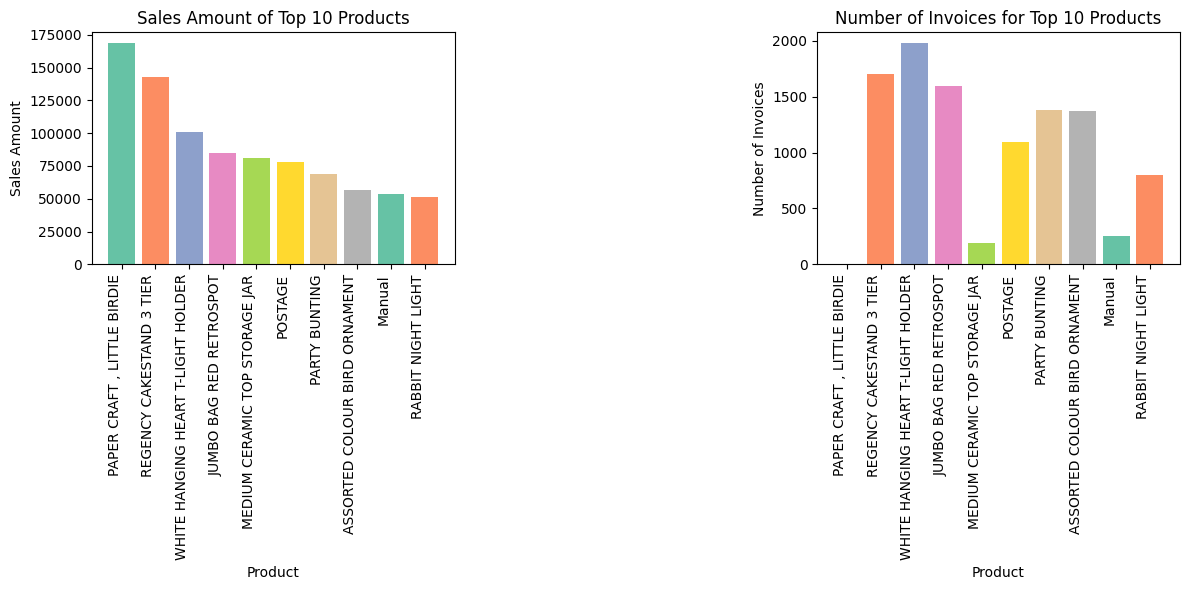

Sales Percentage of Top 10 Products: 9.95%
Events Percentage of Top 10 Products: 2.68%


In [141]:
# Calculate the total revenue for each item
amount_sum = df_fi.groupby("Description")["Amount"].sum().sort_values(ascending=False)

# Calculate transaction quantity for each item
invoice_count = df_fi.groupby("Description")["InvoiceNo"].nunique().sort_values(ascending=False)

# Get the top 10 commodity products
top_10_products = amount_sum.head(10)

# Calculate the revenue rate and number of transactions of the top 10 products
total_amount = amount_sum.sum()
total_invoices = invoice_count.sum()
sales_percentages = (top_10_products.sum() / total_amount) * 100
events_percentages = (invoice_count[top_10_products.index].sum() / total_invoices) * 100

# Create a subplot with 2 vertical axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Draw a vertical bar chart for the revenue rate of the top 10 products
ax1.bar(top_10_products.index, top_10_products, color=sns.color_palette("Set2"))
ax1.set_title("Sales Amount of Top 10 Products")
ax1.set_xlabel("Product")
ax1.set_xticklabels(top_10_products.index, rotation=90, ha='right')
ax1.set_ylabel("Sales Amount")

# Draw a vertical bar chart for the transaction volume ratio of the top 10 products
ax2.bar(top_10_products.index, invoice_count[top_10_products.index],color=sns.color_palette("Set2"))
ax2.set_title("Number of Invoices for Top 10 Products")
ax2.set_xlabel("Product")
ax2.set_xticklabels(top_10_products.index, rotation=90, ha='right')
ax2.set_ylabel("Number of Invoices")

# Make sure there is no overlap between x-axis labels
plt.tight_layout()
# Adjust the distance between two graphs
plt.subplots_adjust(wspace=1)
# Show the chart
plt.show()

# Display information on revenue rate and transaction number of top 10 products
print("Sales Percentage of Top 10 Products: {:.2f}%".format(sales_percentages))
print("Events Percentage of Top 10 Products: {:.2f}%".format(events_percentages))

**Top 10 products account for 9.95% of revenue and 2.68% of transactions** of the entire data. This shows that a small number of products contribute significantly to store sales and performance.

The product with the highest revenue is "Paper Craft, Little Bird", with total sales of 175,000.

Besides, the product "Regency cakestand 3 tier" also has the second highest revenue with nearly 150,000 sales, accounting for about 1,600 transactions.

And the product with the highest number of transactions is "Rabbit Night Light", with a total of 1,800 transactions. This product has the second-highest revenue, with a total revenue of 110,000.

#Pre-processing

Based on the above customer characteristics, the research team chose to use K-Means Clustering to cluster customers and run machine learning for analysis. Therefore, it is necessary to prepare data about RFM (Recency, Frequency, Monetary)

###Recency

In [142]:
# Find the reference date as the maximum InvoiceDate + 1 day
reference_date = df_fi["InvoiceDate"].max() + datetime.timedelta(days=1)
print("Reference Date:", reference_date)

# Calculate the days since the last purchase for each customer
df_fi["days_since_last_purchase"] = (reference_date - df_fi["InvoiceDate"]).dt.days

# Group by CustomerID and calculate the minimum days since the last purchase as recency
customer_history_df = df_fi.groupby("CustomerID")["days_since_last_purchase"].min().reset_index()
customer_history_df.rename(columns={"days_since_last_purchase": "recency"}, inplace=True)

# Display the summary statistics of the recency variable
customer_history_df.describe().transpose()


Reference Date: 2011-12-10 12:50:00


,count,mean,std,min,25%,50%,75%,max
CustomerID,4338.0,15300.408022,1721.808492,12346.0,13813.25,15299.5,16778.75,18287.0
recency,4338.0,92.536422,100.014169,1.0,18.00,51.0,142.00,374.0


<ipython-input-143-25efec09d891>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


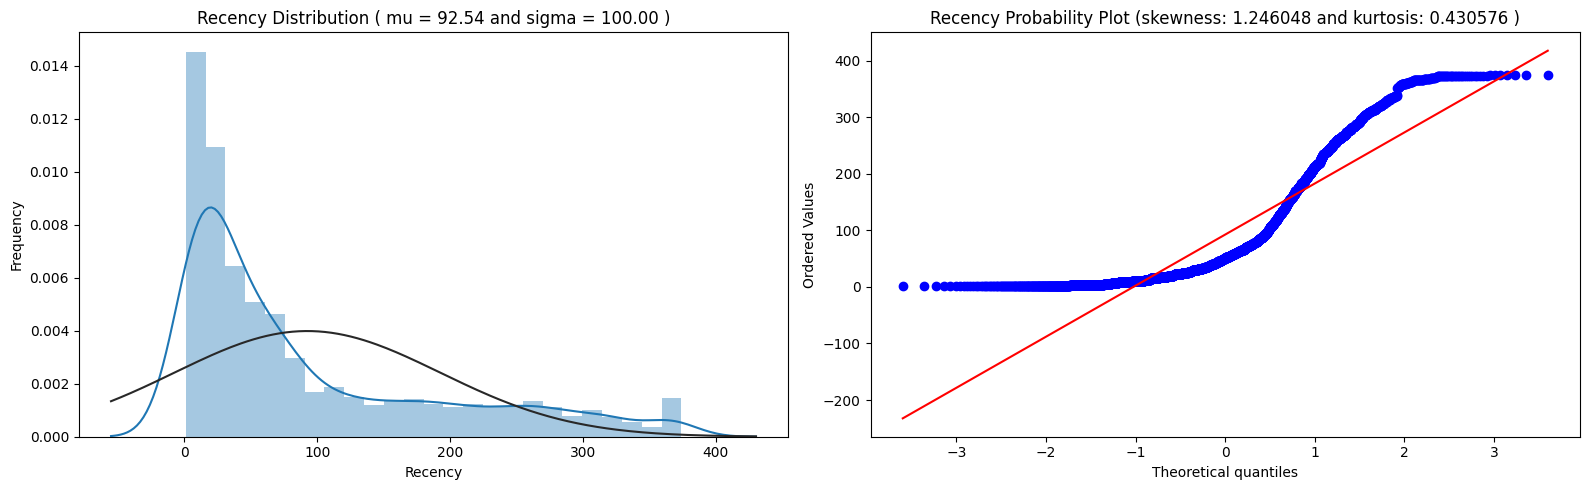

In [143]:
# tạo một biểu đồ QQ (Quantile-Quantile) để kiểm tra tính phân phối chuẩn (normal distribution) của dữ liệu Recency (tính từ mới)
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(16,5))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(customer_history_df.recency, 'Recency')

Through the 2 graphs above, comments:
- The first image on the left shows that the customer recency distribution is **right-skewed**, with a peak on the left and a long tail on the right. It is distinct from the normal distribution and has positive skewness.
- And the remaining chart image on the right, it can be seen that the customer recency does not coincide with the **red diagonal line** representing the normal distribution. The skewness for a normal distribution is 0 and any symmetrical data has a skewness close to 0. However, this chart has skewness = 1.25, indicating that the chart is not symmetrical.

Data sets with positive kurtosis tend to have heavy tails or outliers, and conversely, negative kurtosis indicates a light-tailed distribution. So, with 0.43 positive kurtosis, the customer recency has a heavy tail and some outliers.

###Frequency

<ipython-input-143-25efec09d891>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


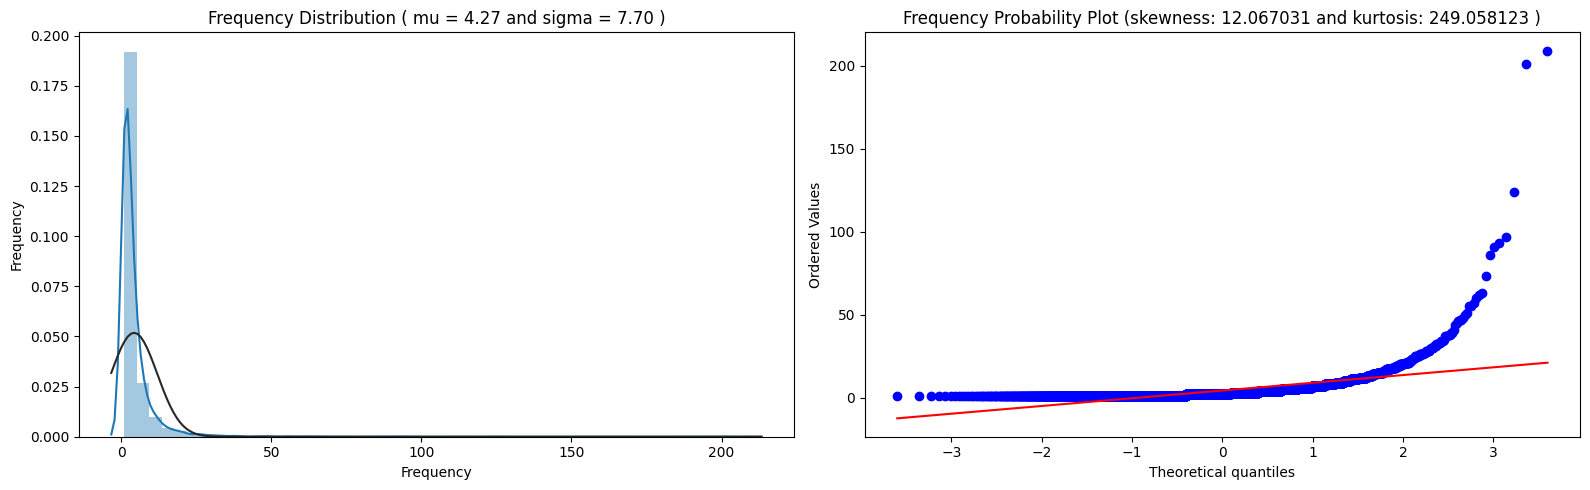

In [144]:
customer_freq = (df_fi[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')

The sales frequency distribution is skewed to the right, with a peak on the left and a long tail on the right. This means that most customers have low purchasing frequency, but some customers have very high purchasing frequency.

The distribution does not resemble the normal distribution, having a high positive skewness of 12.1 and a high positive kurtosis of 249. This confirms that the distribution is right-skewed and has outliers.

###Monetary

<ipython-input-143-25efec09d891>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


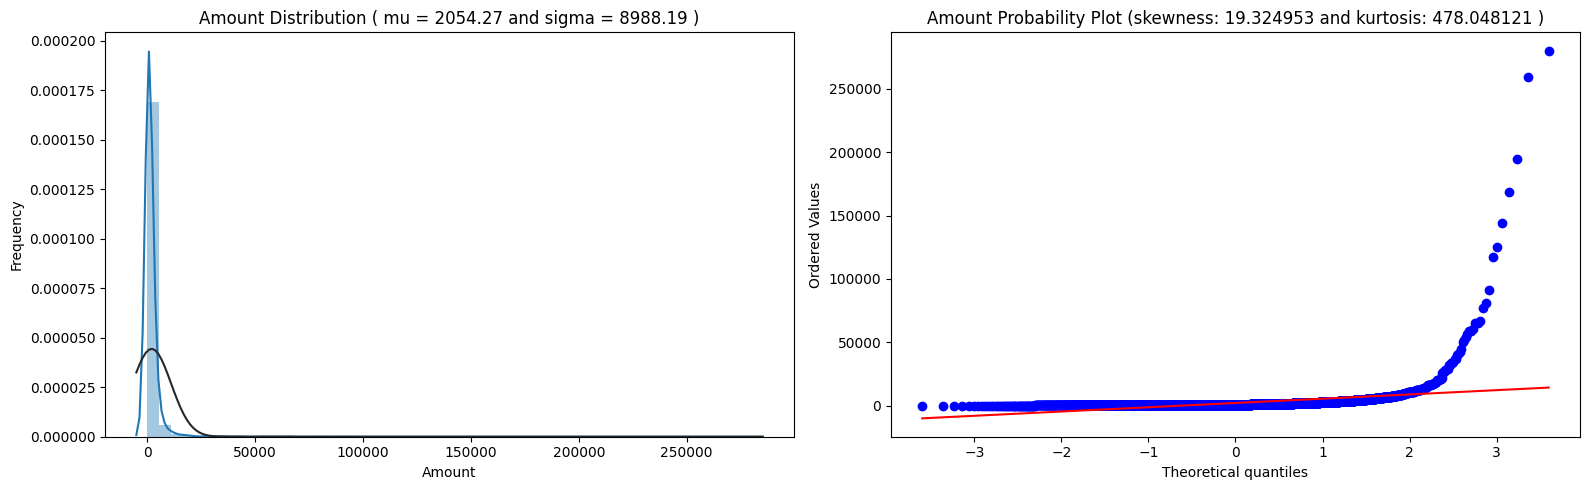

In [145]:
customer_monetary_val = df_fi[['CustomerID', 'Amount']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.Amount, 'Amount')

The sales distribution is skewed right, with a peak on the left and a long tail on the right. This means that most customers have low sales, but there are some customers with very high sales.

The distribution does not resemble the normal distribution, having a high positive skewness of 19.3 and a high positive kurtosis of 478. This confirms that the distribution is right-skewed and has outliers.

Based on the kurtosis of the distribution, it can be inferred that there are more than 10 customers with very high sales, perhaps dozens or even hundreds of times higher than the average sales.

In [146]:
customer_history_df.describe()


,CustomerID,recency,frequency,Amount
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


In [147]:
#standardize independent variables
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['Amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe()

,amount_log,recency_log,frequency_log
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,-7.010426e-16,-1.048288e-16,-9.991495e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-4.179280e+00,-2.630445e+00,-1.048610e+00
25%,-6.841832e-01,-6.124235e-01,-1.048610e+00
50%,-6.094235e-02,1.147066e-01,-2.790440e-01
75%,6.542440e-01,8.296516e-01,7.382675e-01
max,4.721395e+00,1.505796e+00,4.882714e+00


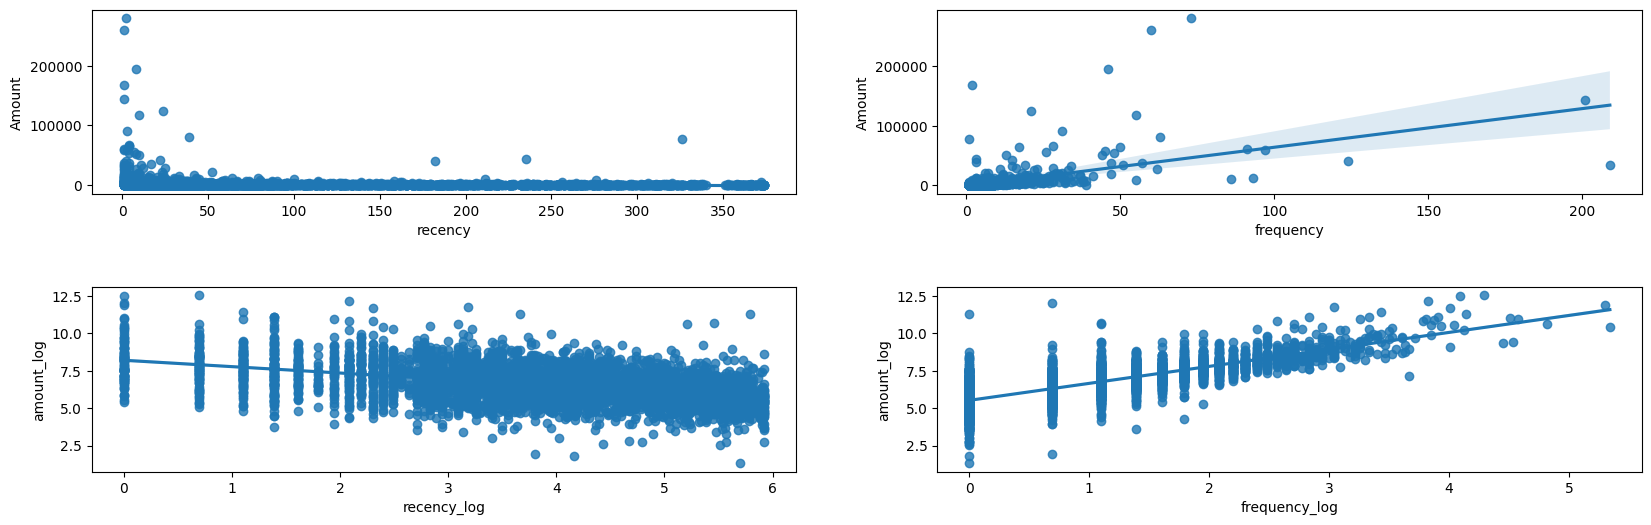

In [148]:
#The graph shows an exponential change in the frequency of purchases
fig = plt.figure(figsize=(20,6))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='Amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='Amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)
plt.subplots_adjust(hspace=0.5)

An overview of all four charts shows that on average, the amount of money customers spend increases as the frequency and frequency of their purchases increases. This shows that customers who purchase more frequently and recently are more likely to be high-value customers.
- The **Recency** graph shows that on average, the number of days since a customer's last purchase decreases as their purchasing frequency increases. This shows that **customers who buy frequently are more likely to be loyal customers.**
- The **Frequency** chart shows that on average, the number of purchases a customer makes decreases as their purchasing frequency increases. This shows that **customers who have purchased more recently are more likely to be active customers.**

From there, the conclusion is that customers are highly valuable, active, and engaged. These customers are more likely to make future purchases and spend more money with the business.
- Use this information to make marketing decisions, such as:
- + Target high-value customers with special offers and promotions.
- + Send personalized recommendations to active customers.
- + Retarget customers who haven't purchased in a while.
- + Create a loyalty program to reward customers for regular purchases.

###Remove outliers

<ipython-input-149-988dae41266f>:2: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  z_scores = stats.zscore(customer_history_df[['recency', 'frequency', 'Amount']])


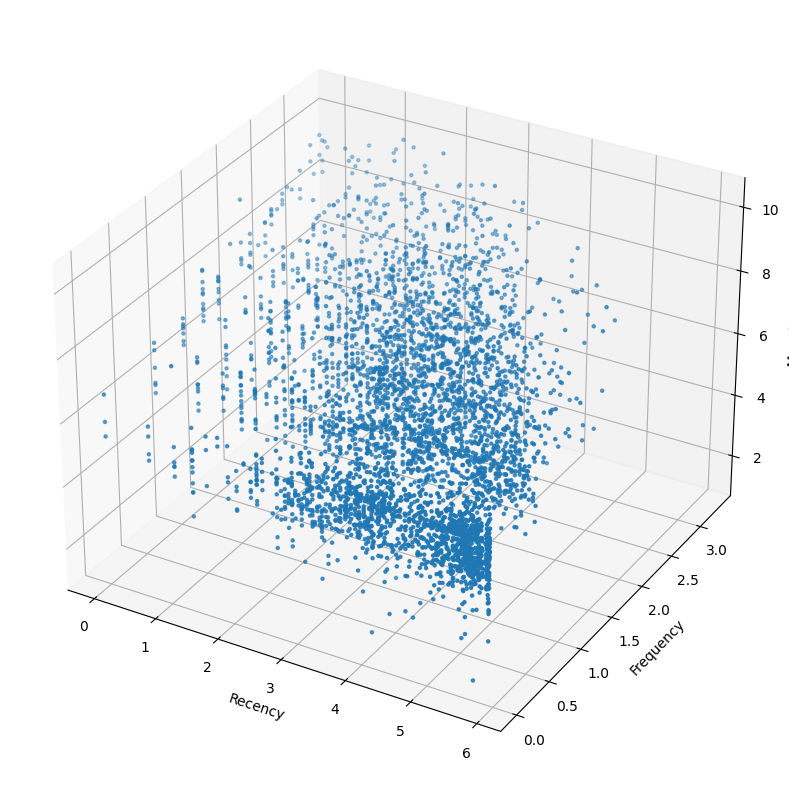

In [149]:
# Calculate z-scores for the variables 'recency', 'frequency', and 'amount'
z_scores = stats.zscore(customer_history_df[['recency', 'frequency', 'Amount']])

# Determine the z-score threshold to determine outlier
threshold = 3

# Filter data points that are not outliers
filtered_df = customer_history_df[(z_scores < threshold).all(axis=1)]

# Draw a 3D chart for filtered_df (DataFrame with outlier removed)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = filtered_df['recency_log']
ys = filtered_df['frequency_log']
zs = filtered_df['amount_log']
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

#Run model - K-means clustering

In [150]:
#initiate variables
cl = 50
corte = 0.1

anterior = 100000000000000
cost = []
K_best = cl

In [151]:
#K-Means cluster -  generation loop
for k in range(1, cl+1):
    model = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101
    )
    model = model.fit(X_scaled)
    labels = model.labels_
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte):
        K_best = k - 1
    cost.append(interia)
    anterior = interia

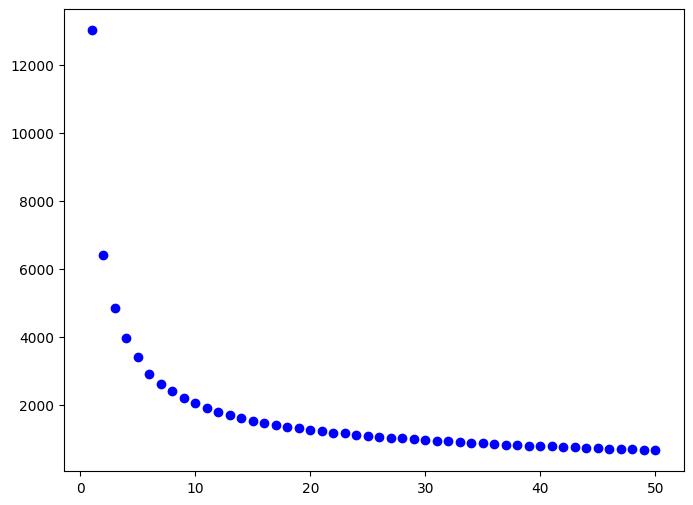

In [152]:
plt.figure(figsize=(8, 6))
plt.scatter(range(1, cl+1), cost, c='blue')
plt.show()

The image shows the relationship between the number of clusters (k) and the dispersion value (inertia) of the clusters. Inertia is a measure of the dispersion of points in a cluster. The inertia value decreases as the clusters increase, indicating that the points in the cluster are more concentrated and the cluster is better clustered.

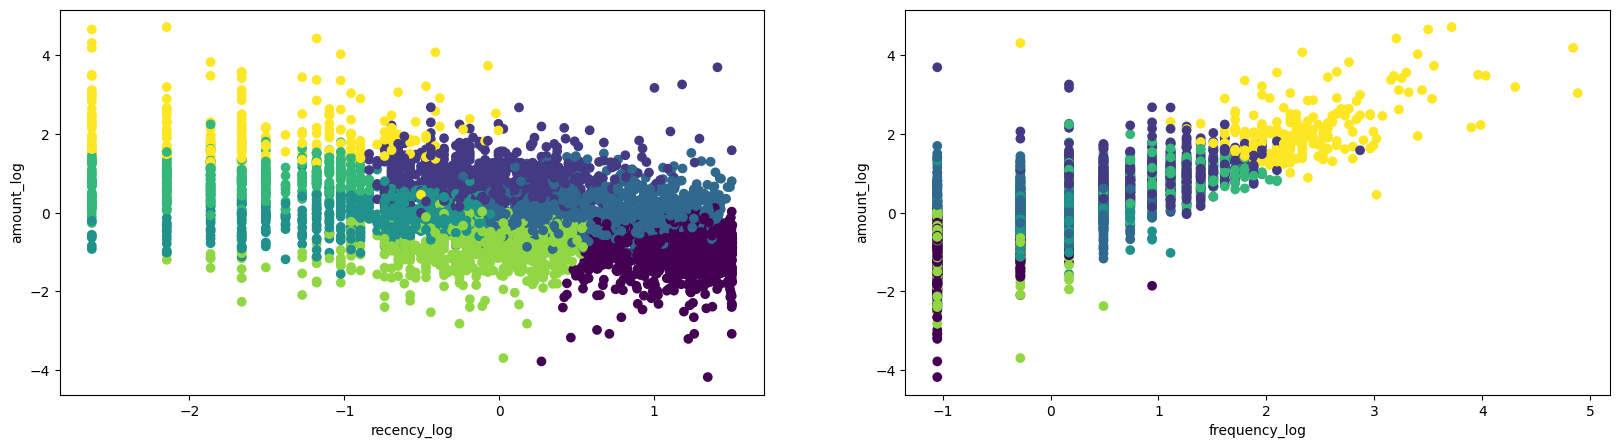

In [153]:
model = KMeans(
    n_clusters=K_best,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=101
)
model = model.fit(X_scaled)
labels = model.labels_

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x=X_scaled[:,1], y=X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x=X_scaled[:,2], y=X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

Customer groups are clustered through the 2 images above, there are 4 cluster groups (kmeans = 4). These clusters are represented by different colors on the image.

- Cluster 1 (blue) includes data points with high values for both the first two features. These can be high-value customers who have purchased frequently and recently.
- Cluster 2 (red) includes data points with high values for the first feature but low values for the second feature. These may be high-value customers who purchase frequently but have not purchased recently.
- Cluster 3 (orange) includes data points with high values for the second feature but low values for the first feature. These may be high-value customers who have purchased recently but do not purchase frequently.
- Cluster 4 (yellow) includes data points with low values for both the first two features. These may be low-value customers who purchase infrequently and have not purchased recently.

Average Silhouette Score for 3 clusters: 0.33912826645988836
Average Silhouette Score for 5 clusters: 0.3056519364434431
Average Silhouette Score for 7 clusters: 0.3085478240811811


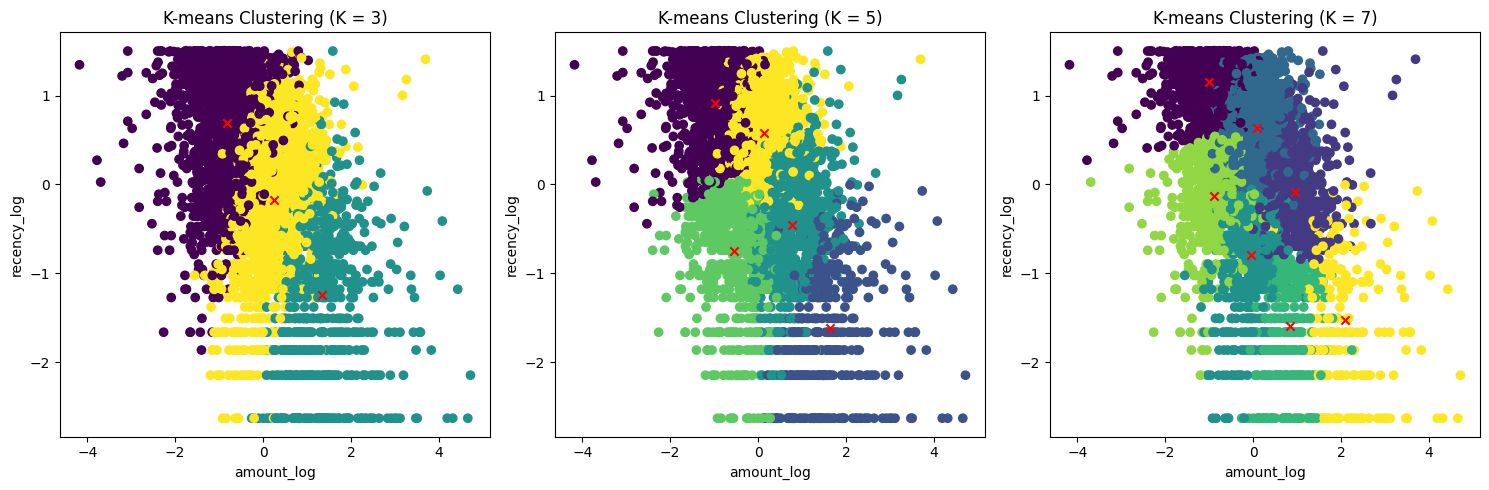

In [154]:
# X_scaled là ma trận đặc trưng đã được chuẩn hóa
X_scaled = scaler.transform(X_subset)

# Chọn số lượng cụm K
K_values = [3, 5, 7]

# Tạo subplot với 1 hàng và len(K_values) cột
fig, axs = plt.subplots(1, len(K_values), figsize=(15, 5))

for i, K in enumerate(K_values):
    # Chạy thuật toán K-means
    clusterer = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)
    centers = clusterer.cluster_centers_

    # Tính toán điểm Silhouette cho từng điểm dữ liệu trong cụm
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    # In điểm Silhouette trung bình của cụm
    print("Average Silhouette Score for", K, "clusters:", silhouette_avg)

    # Vẽ biểu đồ phân tán của từng cụm trên subplot tương ứng
    axs[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
    axs[i].scatter(centers[:, 0], centers[:, 1], marker='x', c='red')
    axs[i].set_xlabel("amount_log")
    axs[i].set_ylabel("recency_log")
    axs[i].set_title("K-means Clustering (K = " + str(K) + ")")

plt.tight_layout()
plt.show()

#Rule Mining with FP Growth

In [155]:
items = list(df_fi.Description.unique())
grouped = df_fi.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

In [156]:
# Hiển thị dataframe mới
transaction_df

,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,...,SET OF 6 RIBBONS PERFECTLY PRETTY,SET OF 6 RIBBONS PARTY,"LETTER ""F"" BLING KEY RING","LETTER ""O"" BLING KEY RING","LETTER ""T"" BLING KEY RING","LETTER ""U"" BLING KEY RING","LETTER ""W"" BLING KEY RING","LETTER ""Z"" BLING KEY RING",PINK CRYSTAL SKULL PHONE CHARM,"PAPER CRAFT , LITTLE BIRDIE"
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18529,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
# Hiển thị tổng số sản phẩm được mua trong mỗi giao dịch - hiện top 10
print(transaction_df.sum(axis=1).head(10))

0     7
1     2
2    12
3     4
4     1
5    20
6     1
7     2
8    16
9     1
dtype: int64


In [158]:
#xử lý lại tập data để đơn giản, phù hợp để chạy thuật toán FP-Growth
def prune_dataset(input_df, length_trans=2, total_sales_perc=0.5, start_item=None, end_item=None, TopCols=None):
    if 'total_items' in input_df.columns:
        del input_df['total_items']

    item_count = input_df.sum().sort_values(ascending=False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending=False))
    item_count.rename(columns={item_count.columns[0]: 'item_name', item_count.columns[1]: 'item_count'}, inplace=True)

    if TopCols:
        input_df['total_items'] = input_df[TopCols].sum(axis=1)
        input_df = input_df[input_df.total_items >= length_trans]
        del input_df['total_items']
        return input_df[TopCols], item_count[item_count.item_name.isin(TopCols)]

    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis=1)
        input_df = input_df[input_df.total_items >= length_trans]
        del input_df['total_items']
        return input_df[selected_items], item_count[start_item:end_item]

    else:
        item_count['item_perc'] = item_count['item_count'] / total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis=1)
        input_df = input_df[input_df.total_items >= length_trans]
        del input_df['total_items']
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]

In [159]:
output_df, item_counts = prune_dataset(input_df=transaction_df, length_trans=2, start_item=0, end_item=10)
AmoutSum = output_df.sum()

# Tính tổng doanh số bán hàng của các sản phẩm
print('Total Sales Amount by the Top 10 Products in Sales Events (Invoice): {:.2f}'.format(AmoutSum.values.sum()))
print('Number of Sales Events:', output_df.shape[0])
print('Number of Products:', output_df.shape[1])

item_counts

Total Sales Amount by the Top 10 Products in Sales Events (Invoice): 8487.00
Number of Sales Events: 3348
Number of Products: 10


,item_name,item_count
0,WHITE HANGING HEART T-LIGHT HOLDER,1978
1,REGENCY CAKESTAND 3 TIER,1703
2,JUMBO BAG RED RETROSPOT,1600
3,PARTY BUNTING,1379
4,ASSORTED COLOUR BIRD ORNAMENT,1375
5,LUNCH BAG RED RETROSPOT,1289
6,SET OF 3 CAKE TINS PANTRY DESIGN,1146
7,POSTAGE,1099
8,JUMBO BAG VINTAGE DOILY,1080
9,LUNCH BAG BLACK SKULL.,1052


In [160]:
new = [{'InvoiceNo': k, **v} for k, v in temp.items()]
transaction_df = pd.DataFrame(new)

In [161]:
def create_transaction_df(df_fi):
  """
  Tạo bảng gồm 2 cột "InvoiceNo" và "Items"

  Args:
    df_fi: DataFrame Pandas chứa dữ liệu hóa đơn

  Returns:
    DataFrame mới chứa 2 cột "InvoiceNo" và "Items"
  """

  items = list(df_fi.StockCode.unique())
  grouped = df_fi.groupby('InvoiceNo')
  transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','StockCode']]
  transaction_df = pd.DataFrame(transaction_level.to_dict('records'))
  transaction_df['Items'] = transaction_df.apply(lambda x: ' '.join([str(s).replace('-','') for s in x['StockCode']]), axis=1)

  return transaction_df

def map_stock_code(stock_code):
    global mapping_table, next_number
    if stock_code in mapping_table:
        return mapping_table[stock_code]
    else:
        mapping_table[stock_code] = next_number
        next_number += 1
        return mapping_table[stock_code]

# Tạo DataFrame chứa dữ liệu giao dịch
transaction_df = create_transaction_df(df_fi)

# Áp dụng ánh xạ StockCode vào DataFrame
transaction_df['Items'] = transaction_df['Items'].apply(lambda x: ' '.join([str(map_stock_code(s)) for s in x.split()]))

# Xóa cột StockCode và InvoiceNo
transaction_df = transaction_df[['Items']]

In [162]:
transaction_df

,Items
0,1 2 3 4 5 6 7
1,8 9
2,10 11 12 13 14 15 16 17 18 19 20 21
3,22 23 24 25
4,26
...,...
18527,67 881
18528,1084 881
18529,616 147 301 996 100 3043 10 636 438 3375 29 28...
18530,1288 3130 1011 305


In [163]:
# Xuất file dataspmf.txt
with open('dataspmf.txt', 'w') as f:
  for row in transaction_df.values:
    f.write('%s\n' % ' '.join(map(str, row)))

In [164]:
from google.colab import files
files.download('dataspmf.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>